### Importing the Modules

In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import re
import string

import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
nltk.download('stopwords')
nltk.download('vader_lexicon')


from collections import Counter

from matplotlib import pyplot as plt
from matplotlib import ticker
import seaborn as sns
import plotly.express as px

sns.set(style="darkgrid")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mohammad.mujtaba\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mohammad.mujtaba\AppData\Roaming\nltk_data...


In [2]:
import pandas as pd
import numpy as np
# nltk
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize, pos_tag
# sklearn
import sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [9]:
# Reading the data file
df=pd.read_csv(r'C:\Users\mohammad.mujtaba\Desktop/indigo_reviews.csv',encoding = 'unicode_escape')
df.head()

,id,Tweets
0,1479007625693917184,#WestBengal has #flight restrictions penalised...
1,1479004123143966723,@mishralokk @IndiGo6E You guys took money for ...
2,1479003857795514372,@IndiGo6E @amankiet07 already shared in the th...
3,1479003470933868544,Payment has done but didn't loaded for next pa...
4,1479003422774861824,I have enough of proof to prove their agenda @...


let's check the shape of the dataframe

In [10]:
df.shape

(100, 2)

let's select the needed columns for our project

In [11]:
needed_columns = ['Tweets']
df= df[needed_columns]
df.head()

,Tweets
0,#WestBengal has #flight restrictions penalised...
1,@mishralokk @IndiGo6E You guys took money for ...
2,@IndiGo6E @amankiet07 already shared in the th...
3,Payment has done but didn't loaded for next pa...
4,I have enough of proof to prove their agenda @...


### Picking out the tweet texts

In [12]:
texts = df['Tweets']
texts

0     #WestBengal has #flight restrictions penalised...
1     @mishralokk @IndiGo6E You guys took money for ...
2     @IndiGo6E @amankiet07 already shared in the th...
3     Payment has done but didn't loaded for next pa...
4     I have enough of proof to prove their agenda @...
                            ...                        
95    RT @kharawala_aamir: This is to bring to your ...
96    @IndiGo6E please help me with the group cancel...
97                     @IndiGo6E Sent you details on DM
98    RT @mrhimanshumali1: Hve called twice on this ...
99                                   @IndiGo6E Reminder
Name: Tweets, Length: 100, dtype: object

### Removing URLs from tweets

In [13]:
remove_url = lambda x:re.sub(r'https\S+' , '', str(x))
texts_lr=texts.apply(remove_url)
texts_lr

0     #WestBengal has #flight restrictions penalised...
1     @mishralokk @IndiGo6E You guys took money for ...
2     @IndiGo6E @amankiet07 already shared in the th...
3     Payment has done but didn't loaded for next pa...
4     I have enough of proof to prove their agenda @...
                            ...                        
95    RT @kharawala_aamir: This is to bring to your ...
96    @IndiGo6E please help me with the group cancel...
97                     @IndiGo6E Sent you details on DM
98    RT @mrhimanshumali1: Hve called twice on this ...
99                                   @IndiGo6E Reminder
Name: Tweets, Length: 100, dtype: object

### Converting all tweets to lowercase

In [14]:
to_lower = lambda x : x.lower()
texts_lr_lc = texts_lr.apply(to_lower)
texts_lr_lc

0     #westbengal has #flight restrictions penalised...
1     @mishralokk @indigo6e you guys took money for ...
2     @indigo6e @amankiet07 already shared in the th...
3     payment has done but didn't loaded for next pa...
4     i have enough of proof to prove their agenda @...
                            ...                        
95    rt @kharawala_aamir: this is to bring to your ...
96    @indigo6e please help me with the group cancel...
97                     @indigo6e sent you details on dm
98    rt @mrhimanshumali1: hve called twice on this ...
99                                   @indigo6e reminder
Name: Tweets, Length: 100, dtype: object

### Removing punctuations

In [15]:
remove_puncs = lambda x: x.translate(str.maketrans('','',string.punctuation))
texts_lr_lc_np = texts_lr_lc.apply(remove_puncs)
texts_lr_lc_np

0     westbengal has flight restrictions penalised\n...
1     mishralokk indigo6e you guys took money for we...
2     indigo6e amankiet07 already shared in the thre...
3     payment has done but didnt loaded for next pag...
4     i have enough of proof to prove their agenda t...
                            ...                        
95    rt kharawalaaamir this is to bring to your not...
96    indigo6e please help me with the group cancell...
97                      indigo6e sent you details on dm
98    rt mrhimanshumali1 hve called twice on this nu...
99                                    indigo6e reminder
Name: Tweets, Length: 100, dtype: object

### Removing stopwords

In [16]:
more_words = ['flight','cancelled', 'indigo6e', 'restrictions', 'group', 'reminder', 'penalised', 'payment', 'money', 'notice', 'late']
stop_words = set(stopwords.words('English'))
stop_words.update(more_words)

remove_words = lambda x :' '.join([word for word in x.split() if word not in stop_words]) 
texts_lr_lc_np_ns = texts_lr_lc_np.apply(remove_words)
texts_lr_lc_np_ns

0     westbengal public wt hapns bookings noidea one...
1      mishralokk guys took web checkin well disgusting
2              amankiet07 already shared thread dm well
3            done didnt loaded next page please respond
4     enough proof prove agenda travolook going file...
                            ...                        
95    rt kharawalaaamir bring able board mumbai duba...
96    please help cancellation full refund cancel ri...
97                                      sent details dm
98    rt mrhimanshumali1 hve called twice num help g...
99                                                     
Name: Tweets, Length: 100, dtype: object

### let's create a big list of words out of all the tweets 

In [17]:
words_list = [word for line in texts_lr_lc_np_ns for word in line.split()]
words_list[:5]

['westbengal', 'public', 'wt', 'hapns', 'bookings']

In [21]:
word_counts = Counter(words_list).most_common(50)
words_df= pd.DataFrame(word_counts)
words_df.columns = ['words','frequency']
words_df.head()


,words,frequency
0,rt,27
1,help,23
2,please,16
3,indigo,15
4,amp,14


In [22]:
px.bar(words_df, x='words', y='frequency',title='Most Common Words')

### put the Cleaned text in main dataframe

In [23]:
df.text = texts_lr_lc_np_ns
df.text.head()

0    westbengal public wt hapns bookings noidea one...
1     mishralokk guys took web checkin well disgusting
2             amankiet07 already shared thread dm well
3           done didnt loaded next page please respond
4    enough proof prove agenda travolook going file...
Name: Tweets, dtype: object

# Sentiment Analysis 

Getting the polarity scores for each tweet

In [24]:
sid = SentimentIntensityAnalyzer()
ps = lambda x : sid.polarity_scores(x)
sentiment_scores = df.text.apply(ps)
sentiment_scores

0     {'neg': 0.08, 'neu': 0.729, 'pos': 0.191, 'com...
1     {'neg': 0.324, 'neu': 0.476, 'pos': 0.2, 'comp...
2     {'neg': 0.0, 'neu': 0.471, 'pos': 0.529, 'comp...
3     {'neg': 0.0, 'neu': 0.723, 'pos': 0.277, 'comp...
4     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
                            ...                        
95    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
96    {'neg': 0.07, 'neu': 0.421, 'pos': 0.509, 'com...
97    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
98    {'neg': 0.0, 'neu': 0.816, 'pos': 0.184, 'comp...
99    {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...
Name: Tweets, Length: 100, dtype: object

In [25]:
sentiment_df = pd.DataFrame(data=list(sentiment_scores))
sentiment_df.head()

,neg,neu,pos,compound
0,0.080,0.729,0.191,0.4939
1,0.324,0.476,0.200,-0.3182
2,0.000,0.471,0.529,0.5423
3,0.000,0.723,0.277,0.3182
4,0.000,1.000,0.000,0.0000


### Labeling the scores based on the compound polarity value

In [26]:
labelize = lambda x : 'not relevant' if x==0 else ('seeking help' if x>0 else 'not seeking help')
sentiment_df['label'] = sentiment_df.compound.apply(labelize)
sentiment_df.head()

,neg,neu,pos,compound,label
0,0.080,0.729,0.191,0.4939,seeking help
1,0.324,0.476,0.200,-0.3182,not seeking help
2,0.000,0.471,0.529,0.5423,seeking help
3,0.000,0.723,0.277,0.3182,seeking help
4,0.000,1.000,0.000,0.0000,not relevant


### let's join two dataframes

In [27]:
data = df.join(sentiment_df.label)
data.head()

,Tweets,label
0,#WestBengal has #flight restrictions penalised...,seeking help
1,@mishralokk @IndiGo6E You guys took money for ...,not seeking help
2,@IndiGo6E @amankiet07 already shared in the th...,seeking help
3,Payment has done but didn't loaded for next pa...,seeking help
4,I have enough of proof to prove their agenda @...,not relevant


### Plotting the sentiment score counts

In [28]:
counts_df = data.label.value_counts().reset_index()
counts_df

,index,label
0,seeking help,48
1,not relevant,28
2,not seeking help,24


<AxesSubplot:xlabel='index', ylabel='label'>

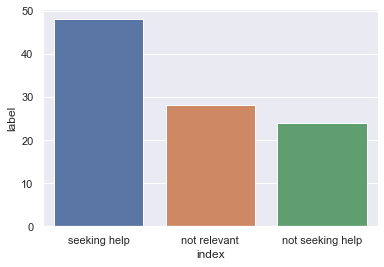

In [29]:
sns.barplot(x='index',y='label',data=counts_df)

### Creating N Grams

In [30]:
def ngram(token, n): 
    output = []
    for i in range(n-1, len(token)): 
        ngram = ' '.join(token[i-n+1:i+1])
        output.append(ngram) 
    return output

In [31]:
def create_feature(text, nrange=(1, 1)):
    text_features = [] 
    text = text.lower() 

    # 1. treat alphanumeric characters as word tokens
    # Since tweets contain #, we keep it as a feature
    # Then, extract all ngram lengths
    text_alphanum = re.sub('[^a-z0-9#]', ' ', text)
    for n in range(nrange[0], nrange[1]+1): 
        text_features += ngram(text_alphanum.split(), n)
    
  
    return Counter(text_features)

### Defining Values for X and Y

In [32]:
X = []

for text in texts_lr_lc_np_ns:
   
    X.append(create_feature(text, nrange=(1, 4)))
    

In [33]:
print(X[0])

Counter({'public': 3, 'westbengal': 1, 'wt': 1, 'hapns': 1, 'bookings': 1, 'noidea': 1, 'one': 1, 'flyspicejet': 1, 'solution': 1, 'goroundrobin': 1, 'call': 1, 'cust': 1, 'care': 1, 'noresponse': 1, 'whose': 1, 'lost': 1, 'loosing': 1, 'thisis': 1, 'newnormal': 1, 'ptinews': 1, 'aajtak': 1, 'toiindianews': 1, 'westbengal public': 1, 'public wt': 1, 'wt hapns': 1, 'hapns bookings': 1, 'bookings noidea': 1, 'noidea one': 1, 'one flyspicejet': 1, 'flyspicejet solution': 1, 'solution goroundrobin': 1, 'goroundrobin call': 1, 'call cust': 1, 'cust care': 1, 'care noresponse': 1, 'noresponse whose': 1, 'whose lost': 1, 'lost public': 1, 'public loosing': 1, 'loosing public': 1, 'public thisis': 1, 'thisis newnormal': 1, 'newnormal ptinews': 1, 'ptinews aajtak': 1, 'aajtak toiindianews': 1, 'westbengal public wt': 1, 'public wt hapns': 1, 'wt hapns bookings': 1, 'hapns bookings noidea': 1, 'bookings noidea one': 1, 'noidea one flyspicejet': 1, 'one flyspicejet solution': 1, 'flyspicejet solu

In [34]:

y = []


y = sentiment_df['label']

### Classifiers 
The following classifiers are being used for this project:
+ `SVC`
+ `LinearSVC`
+ `RandomForestClassifier`
+ `DecisionTreeClassifier`


### Data split: The data is split into 80-20 ratio where 80% for the training and 20% for the testing. We keep 20% to make sure that we have enough amount of the data for testing. We used `train_test_split` to split the data. 

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size = 0.2, random_state = 123)

In [36]:
from sklearn.metrics import accuracy_score

def train_test(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, clf.predict(X_train))
    test_acc = accuracy_score(y_test, clf.predict(X_test))
    
#     print("Training acc: {}".format(train_acc))
#     print("Test acc    : {}".format(test_acc))
    
    return train_acc, test_acc    

### DictVectorizer: This converts the labeled features into sparse vectors

In [37]:
from sklearn.feature_extraction import DictVectorizer
vectorizer = DictVectorizer(sparse = True)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [38]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Classifiers 
svc = SVC()
lsvc = LinearSVC(random_state=123)
rforest = RandomForestClassifier(random_state=123)
dtree = DecisionTreeClassifier()

clifs = [svc, lsvc, rforest, dtree]

# train and test them 
print("| {:25} | {} | {} |".format("Classifier", "Training Accuracy", "Test Accuracy"))
print("| {} | {} | {} |".format("-"*25, "-"*17, "-"*13))
for clf in clifs: 
    clf_name = clf.__class__.__name__
    train_acc, test_acc = train_test(clf, X_train, X_test, y_train, y_test)
    print("| {:25} | {:17.7f} | {:13.7f} |".format(clf_name, train_acc, test_acc))

| Classifier                | Training Accuracy | Test Accuracy |
| ------------------------- | ----------------- | ------------- |
| SVC                       |         0.9625000 |     0.4000000 |
| LinearSVC                 |         1.0000000 |     0.5000000 |
| RandomForestClassifier    |         1.0000000 |     0.4500000 |
| DecisionTreeClassifier    |         1.0000000 |     0.5500000 |
